In [20]:
import pandas as pd
import networkx as nx
import json

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rohang2504/Week-7-ForceLayout/main/data/data_scopus.csv")
# df.head()

In [5]:
nodes = df['Publisher']
# nodes.head()

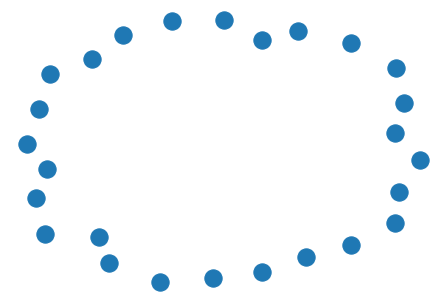

In [6]:
G = nx.Graph()
G.add_nodes_from(nodes)
nx.draw(G)

In [7]:
edges = []
for row in df.iterrows():
  current_paper = row[1]["Publisher"]
  if ";" in row[1]["Author(s) ID"]:
    authors = (row[1]["Author(s) ID"][:-1].split(";"))
    for author in authors:
      papers = df[df["Author(s) ID"].str.contains(author)]["Publisher"].values
      if len(papers)>0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper,paper))
  else:
    continue

# edges

In [8]:
G.add_edges_from(edges)

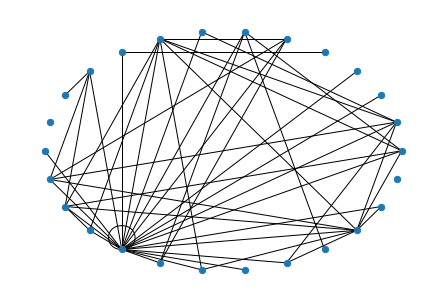

In [9]:
pos1 = nx.drawing.circular_layout(G)
nx.draw(G, pos=pos1, node_size=40)

In [10]:
from networkx.readwrite import json_graph

In [21]:
with open("publisher_network.json", "w") as f:
    json.dump(json_graph.node_link_data(G),f)